## Exploratory Data Analysis(EDA) on Algerian Forest Fires Data

#### Problem Statement

The Algerian Forest Fire dataset presents an opportunity for Exploratory Data Analysis (EDA) to gain insights into the patterns, characteristics, and contributing factors of forest fires in Algeria. The goal of this EDA is to uncover meaningful information that can aid in understanding the dynamics of forest fires and inform potential strategies for prevention and management. By delving into the dataset, we aim to extract valuable knowledge that can assist stakeholders, policymakers, and environmentalists in making informed decisions to mitigate the impact of forest fires in Algeria.

Link to the Data Source: https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset

#### About the dataset

The dataset includes 246 observations that is a regroup of data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria. There are 123 observations for each region.

The period considered here for observation is from June 2012 to September 2012. The dataset includes 11 input features (day, month, year together considered as date) and 1 output feature (Classes).

#### Attribute Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) - Date of the data observations
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely 'Fire' and 'Not fire'

In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
#Reading the dataset
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

In [5]:
df.head()

,Bejaia Region Dataset,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [6]:
#Making the first row as the column
df = pd.DataFrame(df.values[1:], columns=df.iloc[0])

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
#Cleaning the column names
df.columns = df.columns.str.strip()

In [9]:
#Cleaning the 'Classes' variable
df['Classes'] = df['Classes'].str.strip()

In [10]:
#Checking unique value counts of the 'Classes' variable
df['Classes'].value_counts()

fire        137
not fire    106
Classes       1
Name: Classes, dtype: int64

So there are 137 records with output value as 'fire' and 106 records with output value as 'not fire'.

In [11]:
#Checking if there are any missing values in the dataset
df.isnull().sum()

0
day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [12]:
#Displaying the rows with missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


There are no such missing records observed expect for the 'Classes' variable.

So till the index 121, the region is Bejaia and from index 125, the region is Sidi-Bel Abbes.

We can split the dataset into two subgroups on the basis of region and make new column 'Region' in each subgroup to specify the region. The subgroups can then be rejoined to form a new dataset.

In [13]:
df1=df.iloc[:122]
df2=df.iloc[125:]

In [14]:
df1['Region'] = 'Bejaia'
df2['Region'] = 'Sidi Bel-abbes'

In [15]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


In [16]:
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi Bel-abbes
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi Bel-abbes
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi Bel-abbes
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,Sidi Bel-abbes
129,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,Sidi Bel-abbes


In [17]:
#Concatinating the two dataframes(df1, df2)
df = pd.concat([df1, df2])

In [18]:
df.isnull().sum()

0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

There is one missing value in 'Classes' variable.

In [19]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi Bel-abbes


In [20]:
#Filling the missing value with the mode
df['Classes'].fillna(df['Classes'].mode()[0], inplace=True)

In [21]:
df.isnull().sum()

0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Now there are no missing values in the dataset.

In [22]:
##Check if there are any duplicate date in the dataset
df.duplicated().sum()

0

No duplicate data found.

In [23]:
##Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 30.5+ KB


The datatype of all the features is object or string. However, except for 'Classes' and 'Region' rest should be in numerics.

In [24]:
##Changing the datatype of the features with numerical values to numeric
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
      'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
                                                 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].apply(pd.to_numeric, errors='coerce')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 30.5+ KB


Now we can see missing values in 'DC' and 'FWI'.

In [26]:
#Filling the missing values with median
df['DC'].fillna(df['DC'].median(), inplace=True)
df['FWI'].fillna(df['DC'].median(), inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 30.5+ KB


Now we have no missing values.

###Calculating the average 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', and 'FWI' of the two regions

In [28]:
df.groupby('Region').mean()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Region,,,,,,,,,,,,,
Bejaia,15.754098,7.5,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
Sidi Bel-abbes,15.754098,7.5,2012.0,33.163934,55.901639,15.008197,0.678689,81.102459,17.031967,45.567213,5.892623,17.903279,8.706557


### Observations and Insights
As compared to Sidi Bel-abbes region, Bejaia region experiences higher relative humidity, higher wind speed, higher rainfall and has a higher drought code.

On the other hand, Sidi Bel-abbes region experiences higher temperature, has a higher Fine Fuel Moisture Code, higher Initial Spread Index, higher Buildup Index, and higher Fire Weather Index.

###Show the influence of temperature on the possibility of forest fire

Text(0.5, 1.0, 'Sidi Bel-abbes')

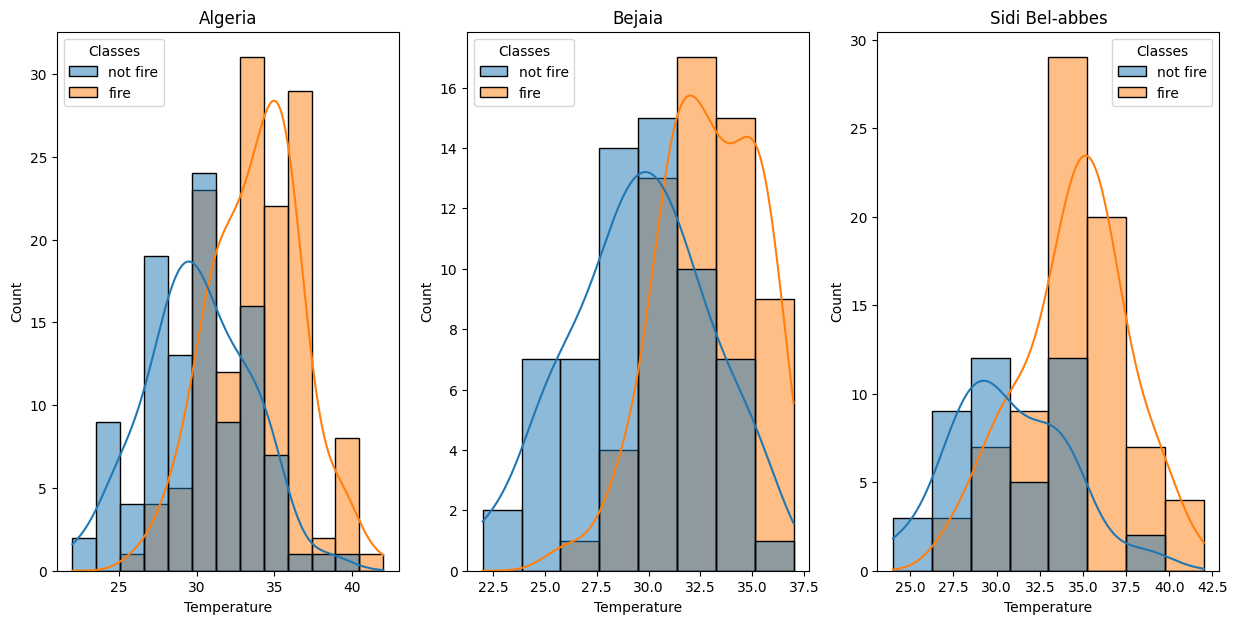

In [29]:
#Plot1
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df, x='Temperature', kde=True, hue='Classes')
plt.title('Algeria')

#Plot2
plt.subplot(132)
sns.histplot(data=df[df['Region']=='Bejaia'], x='Temperature', kde=True, hue='Classes')
plt.title('Bejaia')

#Plot3
plt.subplot(133)
sns.histplot(data=df[df['Region']=='Sidi Bel-abbes'], x='Temperature', kde=True, hue='Classes')
plt.title('Sidi Bel-abbes')

###Observations and Insights
Overall in Algeria, and specifically in the Bejaia and Sidi Bel-abbes regions, highest forest fires happen when the temperature is in between 30 to 37 degree celcius.

###Show the influence of humidity (RH) on the possibility of forest fire

Text(0.5, 1.0, 'Sidi Bel-abbes')

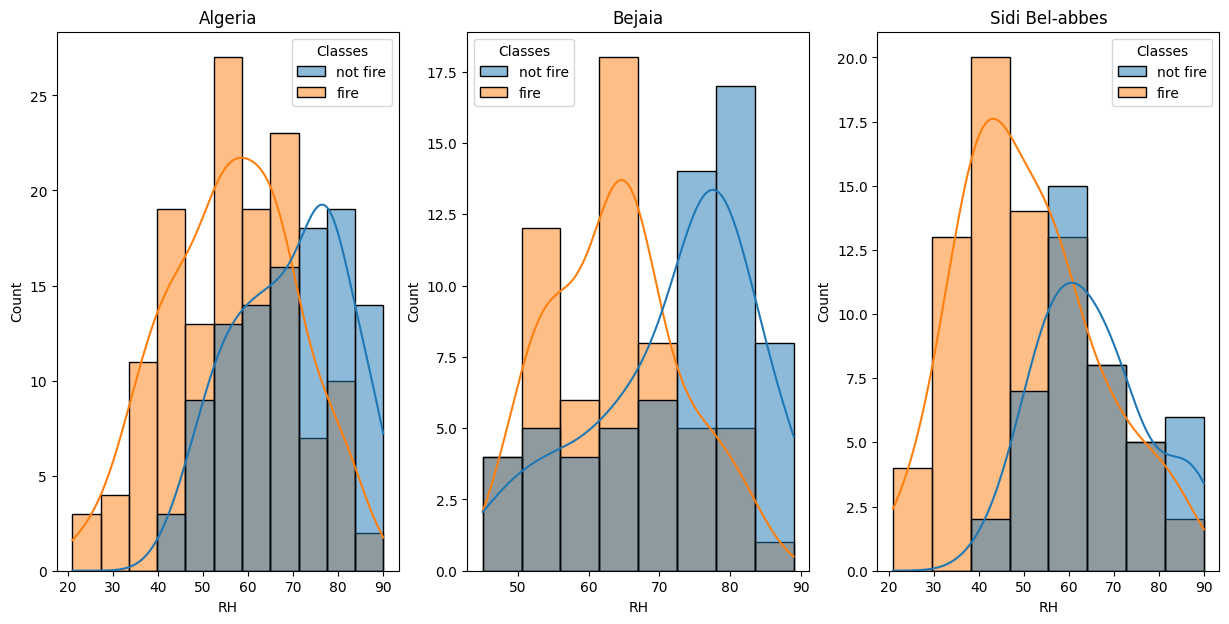

In [30]:
#Plot1
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df, x='RH', kde=True, hue='Classes')
plt.title('Algeria')

#Plot2
plt.subplot(132)
sns.histplot(data=df[df['Region']=='Bejaia'], x='RH', kde=True, hue='Classes')
plt.title('Bejaia')

#Plot3
plt.subplot(133)
sns.histplot(data=df[df['Region']=='Sidi Bel-abbes'], x='RH', kde=True, hue='Classes')
plt.title('Sidi Bel-abbes')

###Observations and Insights
In Bejaia, highest number of forest fires take place when the relative humidity (RH) is in between 50% to 70%.  

In Sidi Bel-abbes, highest number of forest fires take place when the relative humidity (RH) is in between 30% to 65%.  

###Show the effect of wind speed on the chance of forest fire

Text(0.5, 1.0, 'Sidi Bel-abbes')

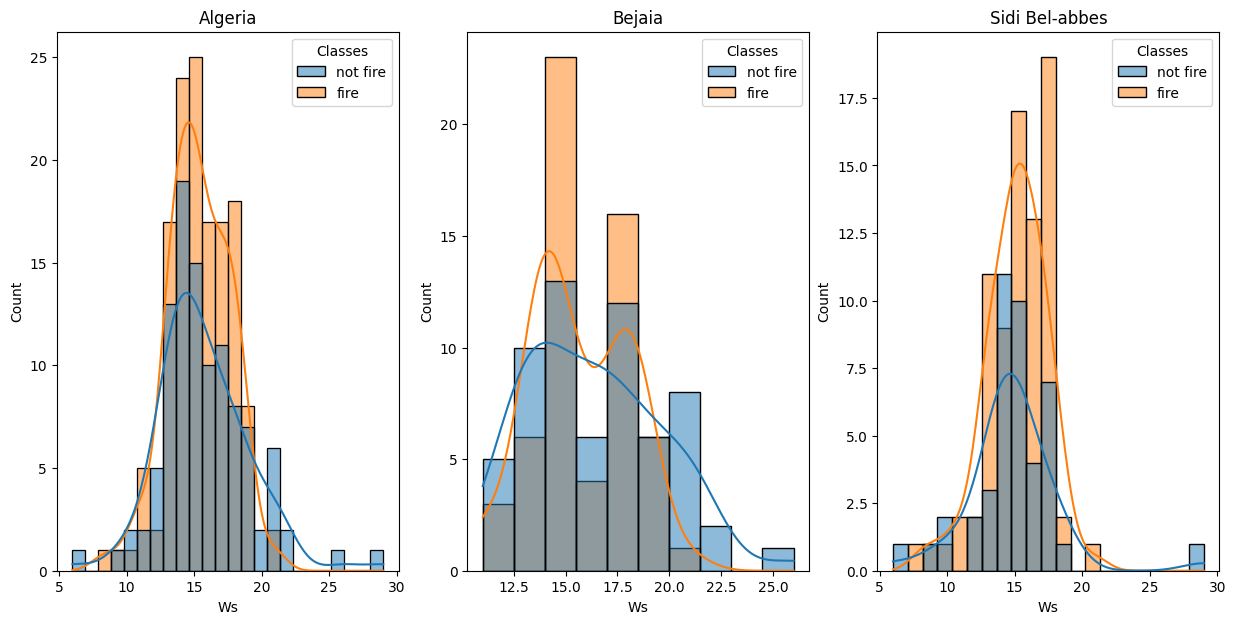

In [31]:
#Plot1
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df, x='Ws', kde=True, hue='Classes')
plt.title('Algeria')

#Plot2
plt.subplot(132)
sns.histplot(data=df[df['Region']=='Bejaia'], x='Ws', kde=True, hue='Classes')
plt.title('Bejaia')

#Plot3
plt.subplot(133)
sns.histplot(data=df[df['Region']=='Sidi Bel-abbes'], x='Ws', kde=True, hue='Classes')
plt.title('Sidi Bel-abbes')

###Observations and Insights
In Bejaia, highest number of forest fires occur when the windspeed (Ws) is in between 12.5 km/hr to 18 km/hr.  

In Sidi Bel-abbes, highest number of forest fires occur when the windspeed (Ws) is in between 14 km/hr to 18 km/hr.  

###Show the effect of rainfall on the possibility of forest fire

Text(0.5, 1.0, 'Sidi Bel-abbes')

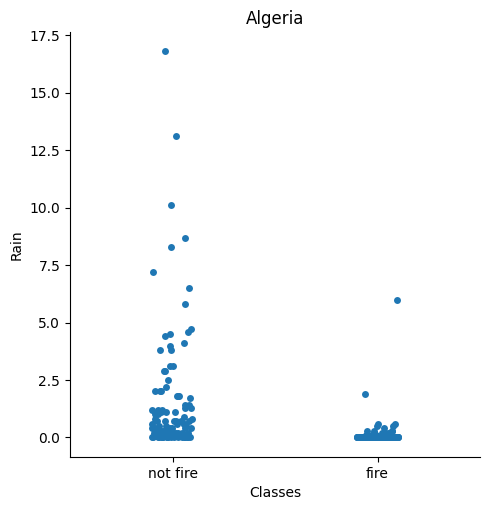

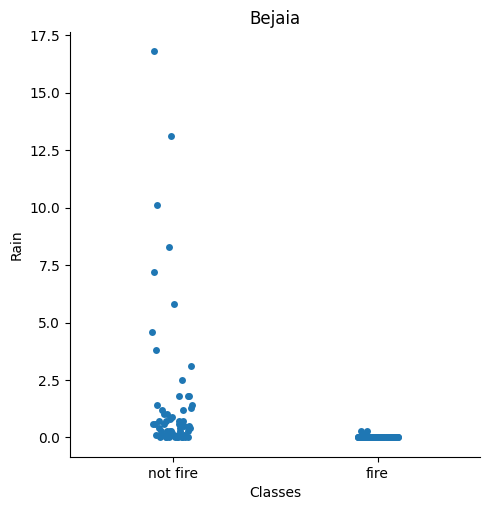

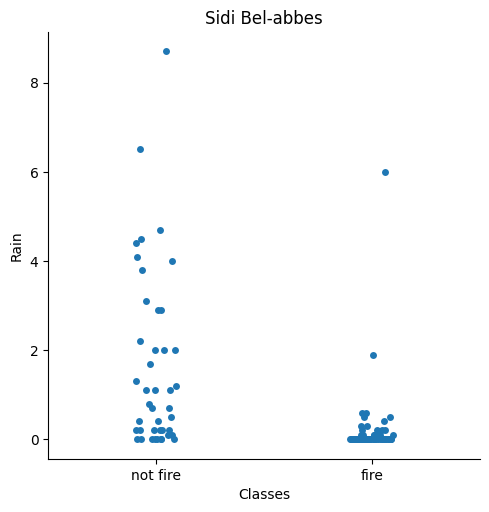

In [32]:
#Plot1
sns.catplot(data=df, x='Classes', y='Rain')
plt.title('Algeria')

#Plot2
sns.catplot(data=df[df.Region=='Bejaia'], x='Classes', y='Rain')
plt.title('Bejaia')

#Plot3
sns.catplot(data=df[df.Region=='Sidi Bel-abbes'], x='Classes', y='Rain')
plt.title('Sidi Bel-abbes')

###Observations and Insights
Heavy rainfall highly reduces the chance of forest fire.

The observation holds true for both Bejaia and Sidi Bel-abbes regions of Algeria.

###Show month wise rainfall analysis - displaying region wise average rainfall in each month

Text(0.5, 1.0, 'Sidi Bel-abbes')

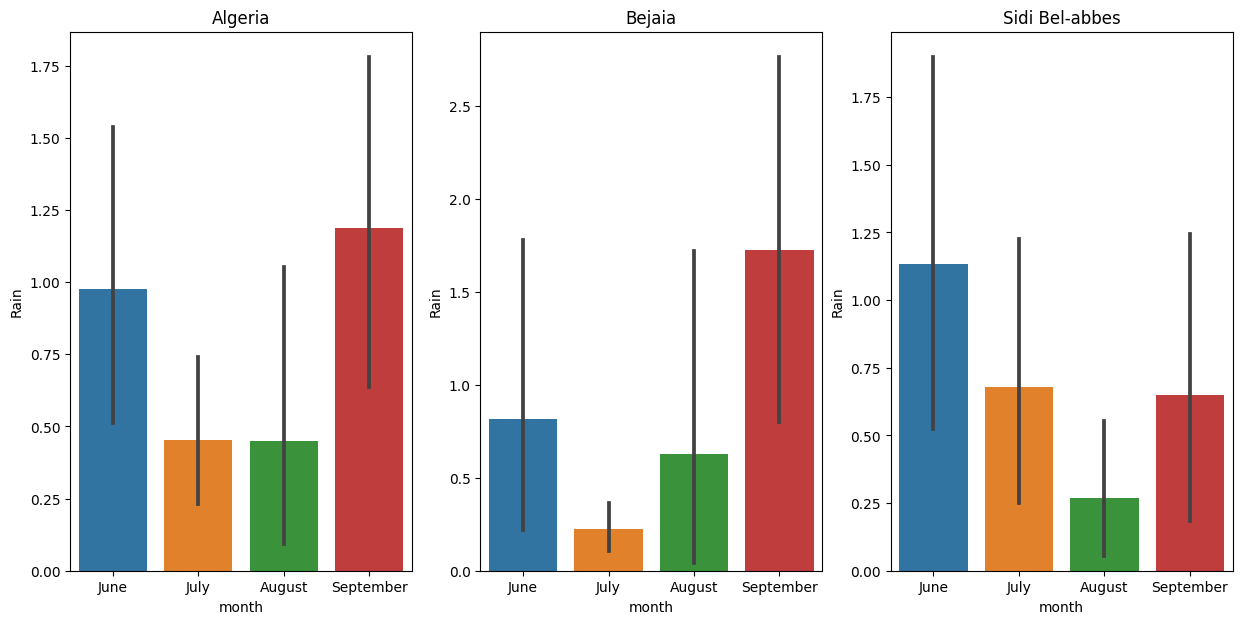

In [33]:
#Plot1
fig, axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.barplot(data=df, x='month', y='Rain')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September'])
plt.title('Algeria')

#Plot2
plt.subplot(132)
sns.barplot(data=df[df['Region']=='Bejaia'], x='month', y='Rain')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September'])
plt.title('Bejaia')

#Plot3
plt.subplot(133)
sns.barplot(data=df[df['Region']=='Sidi Bel-abbes'], x='month', y='Rain')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September'])
plt.title('Sidi Bel-abbes')

###Observations and Insights
In Algeria most of the rainfall takes place in the month of June and September and the rainfall is least in the month of August.

Similar observations can be found in both Bejaia and Sidi Bel-abbes. However, in Sidi Bel-abbes, heavy rainfall can be seen also in July.

###Show month wise temperature analysis - displaying region wise average temperature in each month

Text(0.5, 1.0, 'Sidi Bel-abbes')

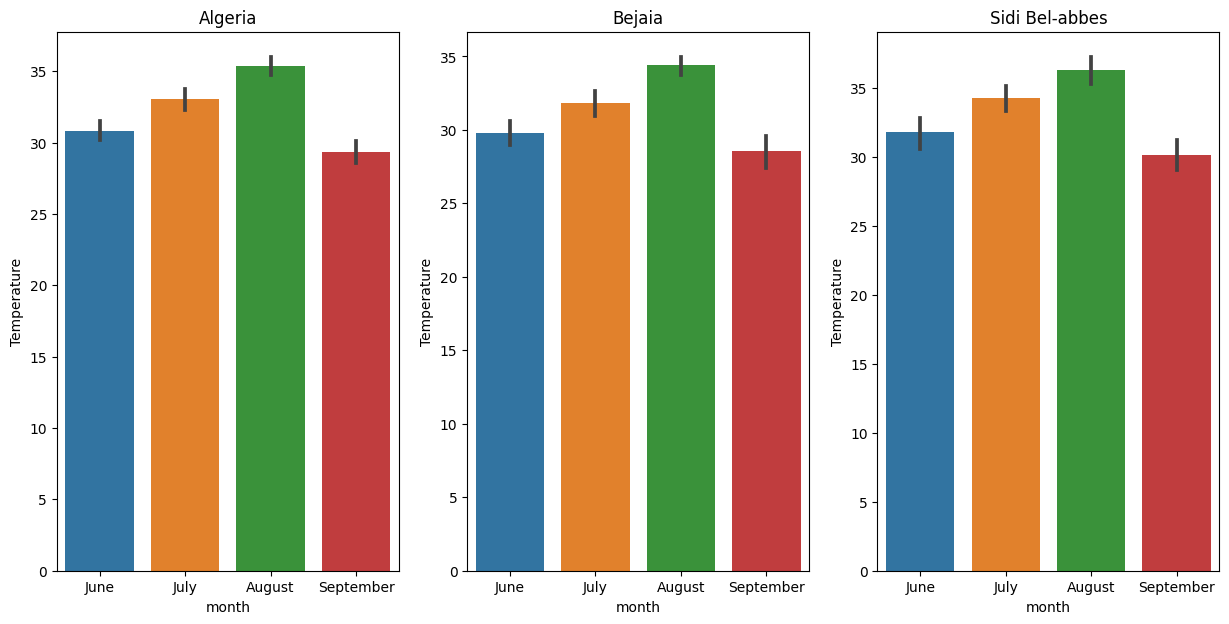

In [34]:
#Plot1
fig, axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.barplot(data=df, x='month', y='Temperature')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September'])
plt.title('Algeria')

#Plot2
plt.subplot(132)
sns.barplot(data=df[df['Region']=='Bejaia'], x='month', y='Temperature')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September'])
plt.title('Bejaia')

#Plot3
plt.subplot(133)
sns.barplot(data=df[df['Region']=='Sidi Bel-abbes'], x='month', y='Temperature')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September'])
plt.title('Sidi Bel-abbes')

###Observations and Insights
The temperature tends to remain high in the month August and low in September.

The observation holds true for both Bejaia and Sidi Bel-abbes.

###Show month wise forest fire analysis

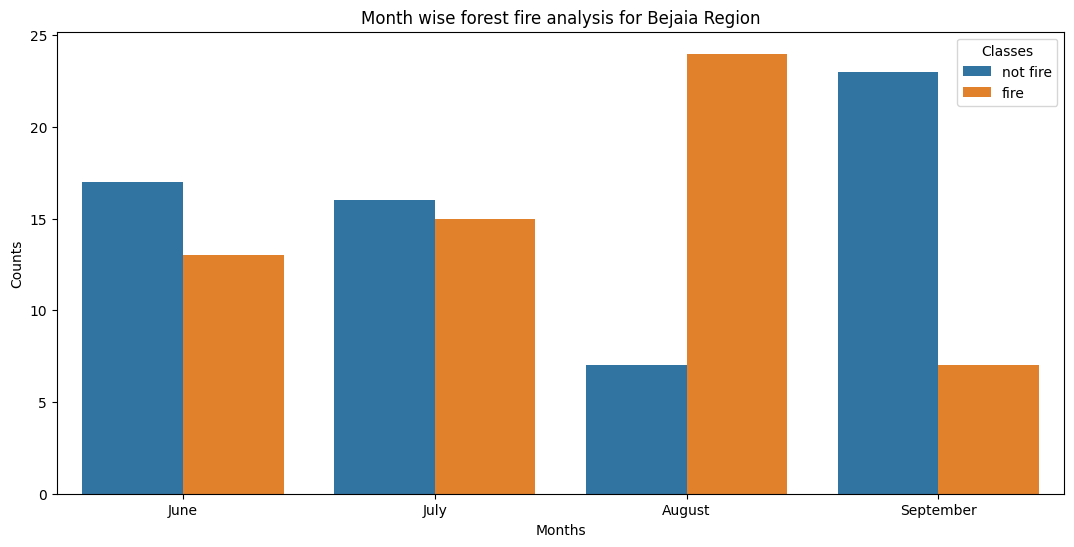

In [35]:
data_region = df.loc[df['Region']=='Bejaia']
plt.figure(figsize=(13,6))
sns.countplot(x='month', hue='Classes', data=data_region)
plt.title('Month wise forest fire analysis for Bejaia Region')
plt.ylabel('Counts')
plt.xlabel('Months')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September'])
plt.show()

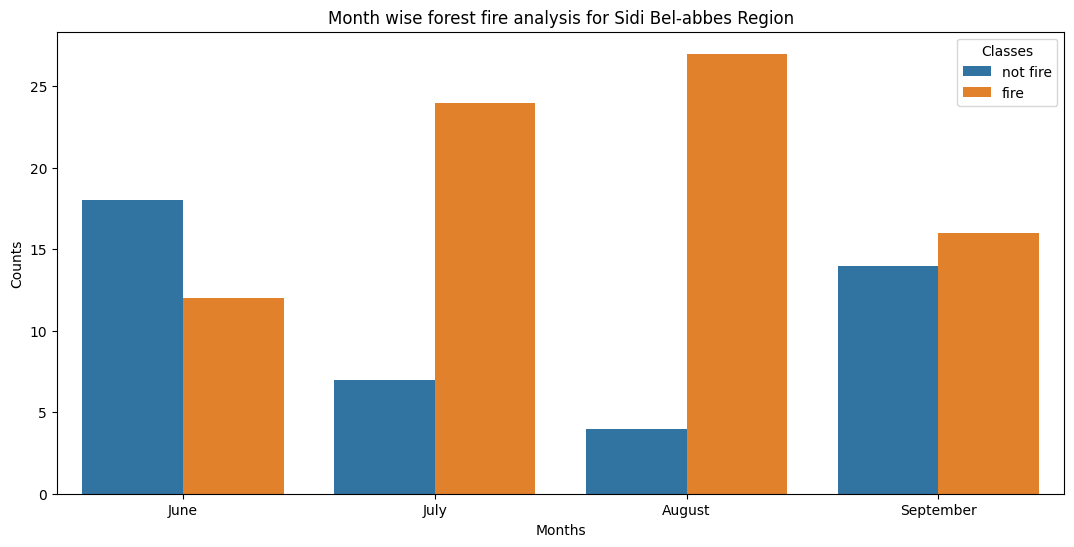

In [36]:
data_region = df.loc[df['Region']=='Sidi Bel-abbes']
plt.figure(figsize=(13,6))
sns.countplot(x='month', hue='Classes', data=data_region)
plt.title('Month wise forest fire analysis for Sidi Bel-abbes Region')
plt.ylabel('Counts')
plt.xlabel('Months')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September'])
plt.show()

###Observations and Insights
The maximum number of forest fires has occured in the month of August in both regions.

The minimum number of forest fires has occured in the month of September in both regions.

###Check the effect of 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI' indexes on the chance of occurance of forest fire.

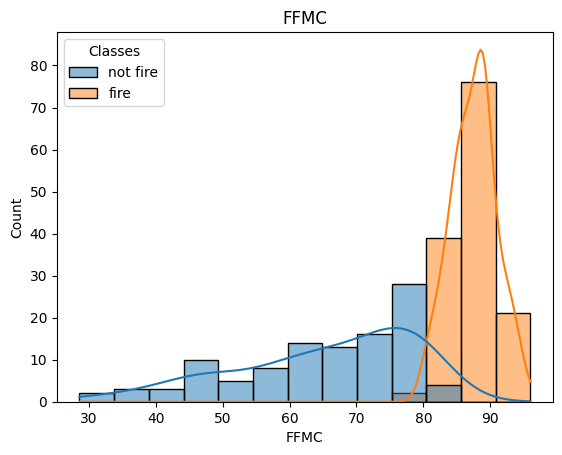

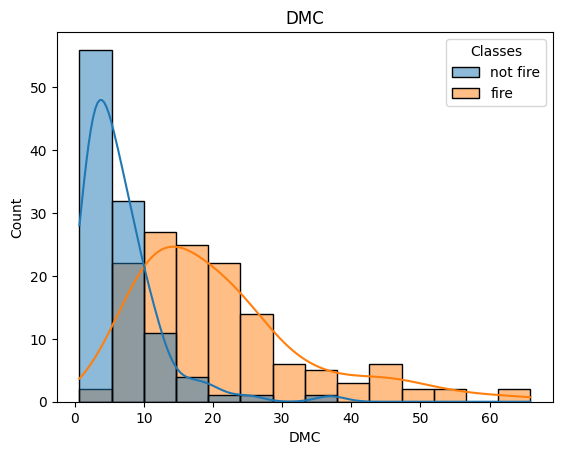

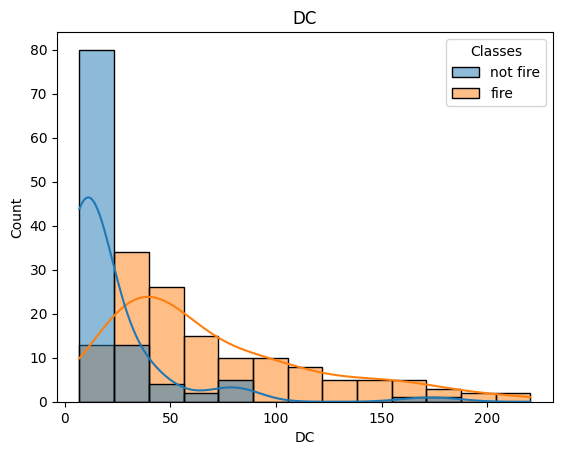

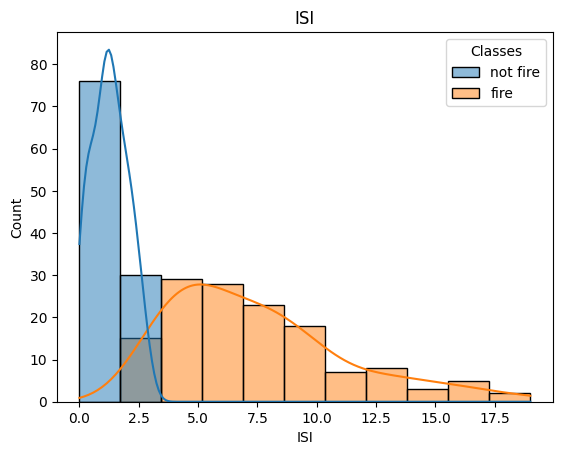

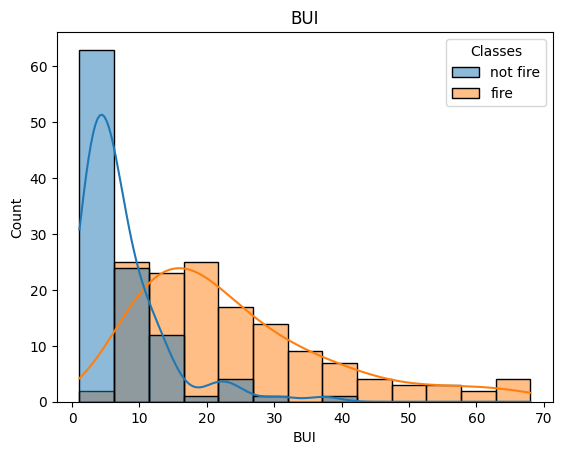

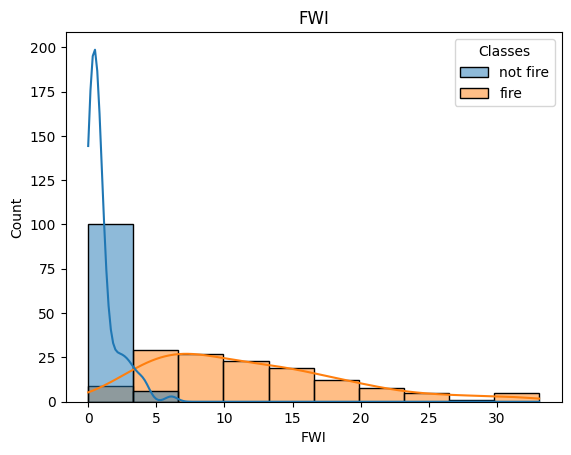

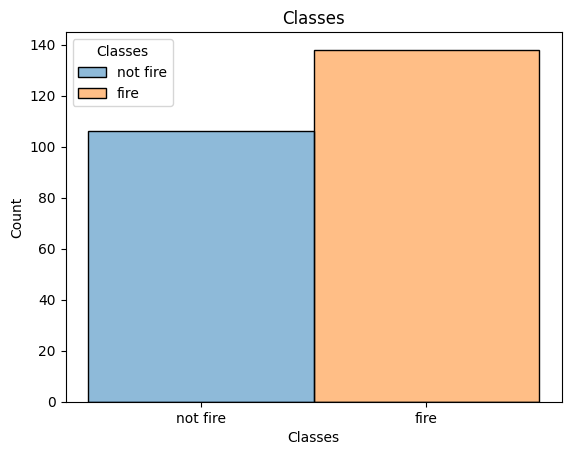

In [37]:
new_df = df.drop(['Region','Temperature','Rain','Ws','RH', 'day', 'month', 'year'], axis=1)
for feature in new_df:
    sns.histplot(data = new_df,x=feature, hue = 'Classes', kde=True)
    plt.title(feature)
    plt.show()

###Observations and Inference
FFMC above 75 has a high chance of forest fire.

DMC in the range 10-20 has a high chance of forest fire.

DC in the range 25-100 has a high chance of forest fire.

ISI in the range 3-12.5 has a high chance of forest fire.

BUI in the range 10-40 has a high chance of forest fire.

FWI in the range 3-25 has a high chance of forest fire.

###Conclusion

Through rigorous exploration, the EDA on the Algerian Forest Fire dataset uncovers vital patterns and correlations. This knowledge is instrumental for informed decision-making, guiding strategies for effective fire management and environmental conservation. The analysis sets the stage for future predictive modeling, enhancing proactive measures to mitigate forest fire impact.